Shape of final DataFrame: (569, 91)


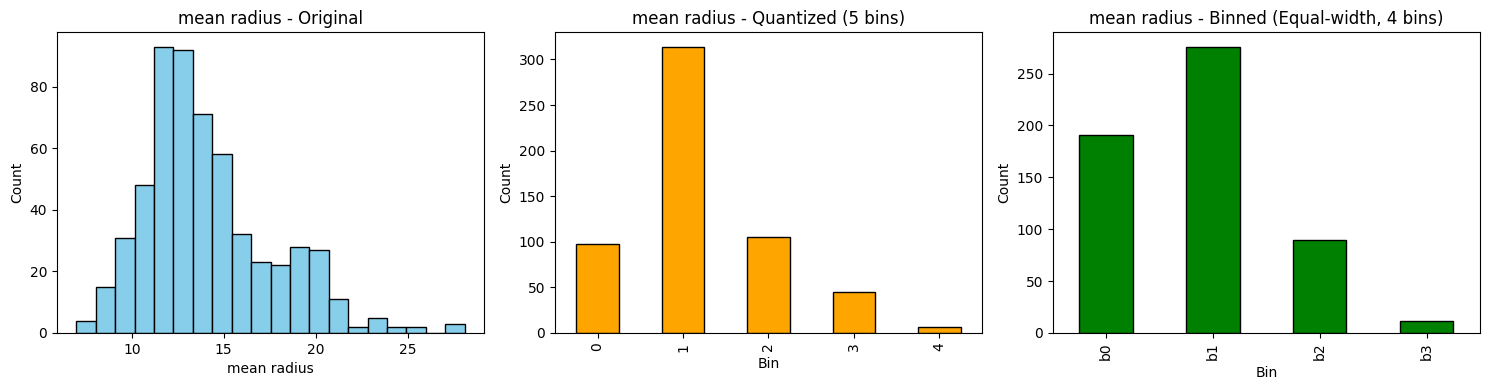

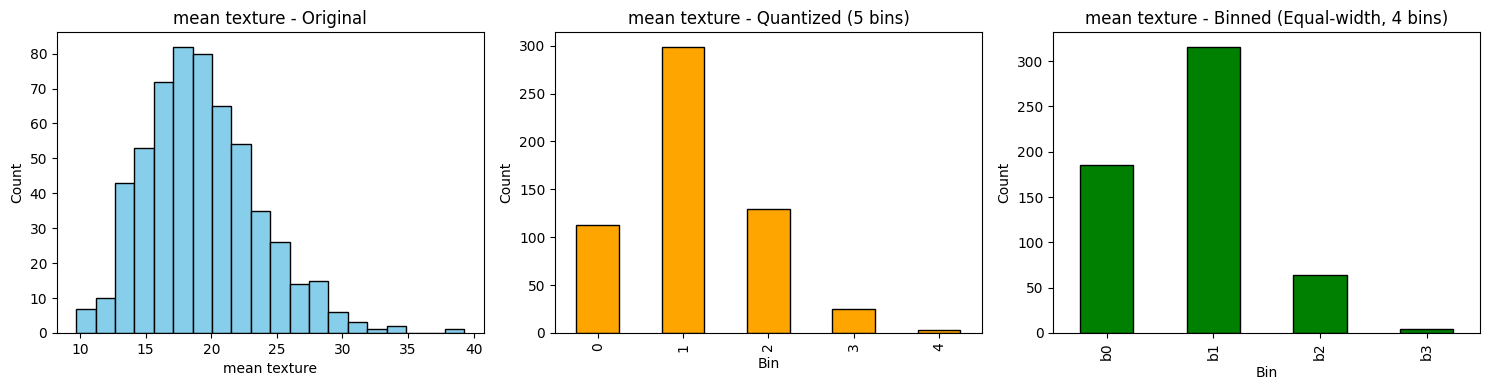

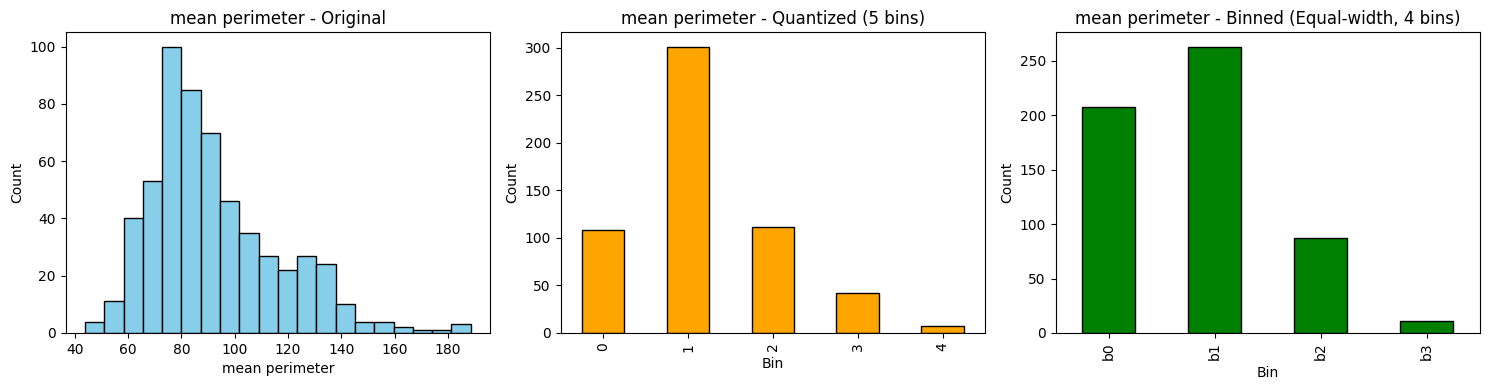

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.datasets import load_breast_cancer

np.random.seed(42)

cancer = load_breast_cancer()
df = pd.DataFrame(cancer.data, columns=cancer.feature_names)
df["target"] = cancer.target

continuous_features = [c for c in df.columns if c != "target"]

quantizer = KBinsDiscretizer(n_bins=5, encode="ordinal", strategy="uniform")
quantized_data = quantizer.fit_transform(df[continuous_features])
df_quantized = pd.DataFrame(quantized_data, columns=continuous_features)

df_with_quantized = df.copy()
for col in df_quantized.columns:
    df_with_quantized[col + "_quantized"] = df_quantized[col].astype(int)

def equal_width_bins(series, n_bins=4, labels=None):
    bins = np.linspace(series.min(), series.max(), n_bins + 1)
    if labels is None:
        labels = [f"b{i}" for i in range(n_bins)]
    return pd.cut(series, bins=bins, labels=labels, include_lowest=True)

df_binned = pd.DataFrame(index=df.index)
for col in continuous_features:
    df_binned[col + "_bin_width"] = equal_width_bins(df[col], n_bins=4)

df_transformed = df.copy()
for col in continuous_features:
    df_transformed[col + "_quantized"] = df_quantized[col].astype(int)
    df_transformed[col + "_bin_width"] = df_binned[col + "_bin_width"]

print("Shape of final DataFrame:", df_transformed.shape)

features_to_plot = ["mean radius", "mean texture", "mean perimeter"]
for feature in features_to_plot:
    plt.figure(figsize=(15, 4))

    plt.subplot(1, 3, 1)
    plt.hist(df[feature], bins=20, color="skyblue", edgecolor="black")
    plt.title(f"{feature} - Original")
    plt.xlabel(feature)
    plt.ylabel("Count")

    plt.subplot(1, 3, 2)
    df_transformed[feature + "_quantized"].value_counts().sort_index().plot(
        kind="bar", color="orange", edgecolor="black"
    )
    plt.title(f"{feature} - Quantized (5 bins)")
    plt.xlabel("Bin")
    plt.ylabel("Count")

    plt.subplot(1, 3, 3)
    df_transformed[feature + "_bin_width"].value_counts().sort_index().plot(
        kind="bar", color="green", edgecolor="black"
    )
    plt.title(f"{feature} - Binned (Equal-width, 4 bins)")
    plt.xlabel("Bin")
    plt.ylabel("Count")

    plt.tight_layout()
    plt.show()


In [2]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer

data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)
df["target"] = data.target

continuous_features = df.drop(columns=["target"])
print("Selected continuous features for transformation:")
print(continuous_features.describe())

df_binned = df.copy()
for col in continuous_features.columns:
    df_binned[col + "_bin_width"] = pd.cut(df[col], bins=4, labels=[0, 1, 2, 3])
    df_binned[col + "_bin_freq"] = pd.qcut(df[col], q=4, labels=[0, 1, 2, 3], duplicates="drop")

print("\nFirst 5 rows with binned features added:")
print(df_binned.head())


Selected continuous features for transformation:
       mean radius  mean texture  mean perimeter    mean area  \
count   569.000000    569.000000      569.000000   569.000000   
mean     14.127292     19.289649       91.969033   654.889104   
std       3.524049      4.301036       24.298981   351.914129   
min       6.981000      9.710000       43.790000   143.500000   
25%      11.700000     16.170000       75.170000   420.300000   
50%      13.370000     18.840000       86.240000   551.100000   
75%      15.780000     21.800000      104.100000   782.700000   
max      28.110000     39.280000      188.500000  2501.000000   

       mean smoothness  mean compactness  mean concavity  mean concave points  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380 